In [28]:
import numpy as np; np.random.seed(31)
import os 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [29]:
dataset_path = os.path.join(os.getcwd(), 'dataset', 'pickles')

# Load the data

filenames = os.listdir(dataset_path)
data = {}
for filename in filenames :
    data[filename.split('.')[0]] = pd.read_pickle(os.path.join(dataset_path, filename))

In [30]:
font_names = list(data.keys())
print(len(font_names), *np.random.choice(font_names, 5), sep='\n')


752
Belanosima-Bold
AnonymousPro-Regular
AreYouSerious-Regular
BarlowCondensed-ExtraBold
Bangers-Regular


In [31]:

font = np.random.choice(font_names)
print(font)

# Plot the data

def plot_data(font) :

    # Get the data
    df = data[font]
    images = df['images']

    # for each image in the images, plot it
    for i in range(len(images)) :
        plt.subplot(1, len(images), i+1)
        plt.imshow(images[i], cmap='gray')
        plt.axis('off')
    plt.show()
    images = np.array(images)
    print(images.shape)


plot_data(font)


BarlowSemiCondensed-SemiBoldItalic


(26, 28, 28)


In [32]:

#check if all fonts have 26 characters with 28x28 pixels
for font_name in font_names :
  font_chars = np.array(data[font_name]['images'])
  if font_chars.shape != (26, 28, 28) : 
    print(font_name, font_chars.shape)
    plot_data(font_name)
    # remove these fonts from the dataset
    data.pop(font_name)

Chenla (26, 28, 28, 4)


(26, 28, 28, 4)
AdobeBlank-Regular (26, 28, 28, 4)


(26, 28, 28, 4)
AksaraBaliGalang-Regular (26, 28, 28, 4)


(26, 28, 28, 4)
Content-Bold (26, 28, 28, 4)


(26, 28, 28, 4)
Content-Regular (26, 28, 28, 4)


(26, 28, 28, 4)


747
(747, 26, 28, 28)


(-0.5, 27.5, 27.5, -0.5)

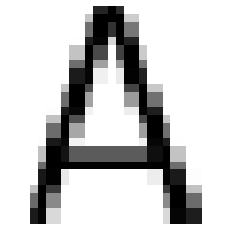

In [33]:
count_fonts = len(list(data.keys()))
print(count_fonts)
# make a count_fonts x 26 x 28 x 28 array from the data

def make_array(data) :
    count_fonts = len(data.keys())
    count_chars = 26
    count_images = len(data[list(data.keys())[0]]['images'])
    images = np.zeros((count_fonts, count_chars, 28, 28))
    for i, font in enumerate(data.keys()) :
        for j in range(count_chars) :
            images[i, j] = data[font]['images'][j]
    return images

images = make_array(data)
print(images.shape)

#plot the array
random_font = np.random.choice(font_names)
plt.imshow(images[font_names.index(random_font), 0], cmap='gray')
plt.axis('off')

In [34]:
# Only single character
print(images.shape)
def make_single_char_array(images, index) :
    return images[:, index]

single_char_images = make_single_char_array(images, 0)
print(single_char_images.shape)


(747, 26, 28, 28)
(747, 28, 28)


In [55]:
images_copy = images.copy() 
num_fonts, num_chars, h,w = images_copy.shape
assert h == w

images_copy = images_copy.reshape(num_fonts, num_chars * h * w)

# images_copy should have numbers till 6 decimal places


# save as a csv file in dataset/

csv_path = os.path.join(os.getcwd(), 'dataset', 'csv')

if not os.path.exists(csv_path) :
    os.mkdir(csv_path)

csv_filename = os.path.join(csv_path, 'images.csv')
np.savetxt(csv_filename, images_copy, delimiter=',')


In [35]:
make_single_char_array(images, 3).shape

(747, 28, 28)

In [36]:
#show all D in single_char_images
def plot_char(index) :
    single_char_images = make_single_char_array(images, index)
    plt.subplots(figsize=(28, 28))
    plt.subplot(1, len(font_names)+1, 1)

    for i in range(len(font_names)) :
        plt.subplot(1, len(font_names), i+1)
        plt.imshow(single_char_images[i], cmap='gray')
        plt.axis('off')
    plt.show()


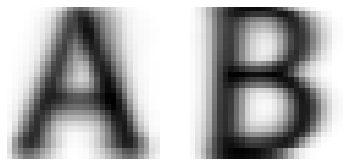

In [37]:
array_s = make_single_char_array(images, 1)
mean_s=np.mean(array_s, axis=0)
array_d = make_single_char_array(images, 0)
mean_d=np.mean(array_d, axis=0)

plt.subplot(1, 2, 1)
plt.imshow(mean_d, cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(mean_s, cmap='gray')
plt.axis('off')
plt.show()

In [38]:
array_d_0 = array_d - array_d.mean(axis=0)
array_s_0 = array_s - array_s.mean(axis=0)

# plt.subplot(1, 2, 1)
# plt.imshow(array_d_0[0], cmap='gray')
# plt.axis('off')
# plt.subplot(1, 2, 2)
# plt.imshow(array_s_0[0], cmap='gray')
# plt.axis('off')
# plt.show()

(747, 747) (747,) (747, 784)


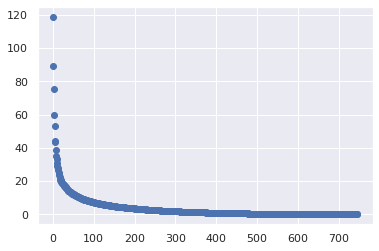

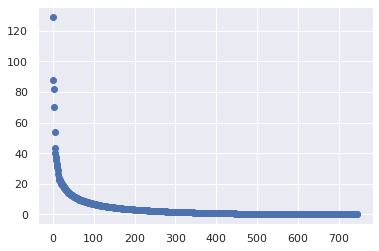

In [39]:
array_d_0 = array_d_0.reshape(-1, 28*28)
array_s_0 = array_s_0.reshape(-1, 28*28)

U0, S0, V0 = np.linalg.svd(array_d_0, full_matrices=False)
U1, S1, V1 = np.linalg.svd(array_s_0, full_matrices=False)

print(U0.shape, S0.shape, V0.shape)

plt.scatter(range(len(S0)), S0)
plt.show()

plt.scatter(range(len(S1)), S1)
plt.show()

0


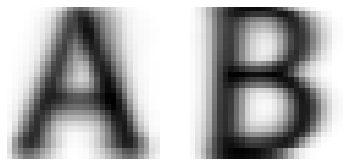

10


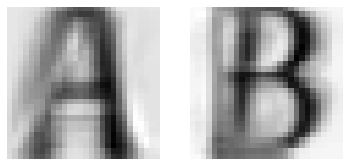

20


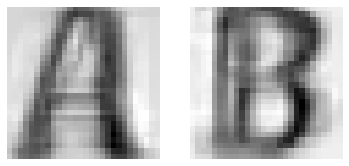

30


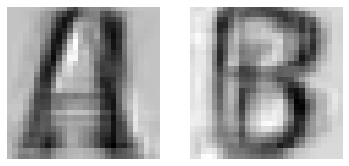

40


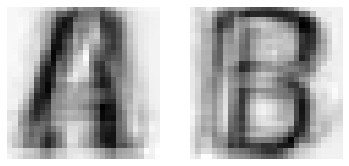

50


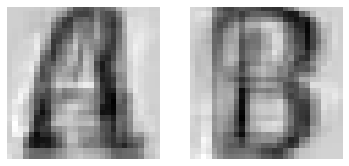

60


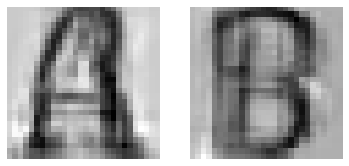

70


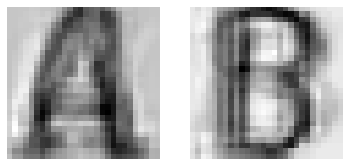

80


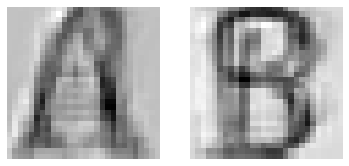

90


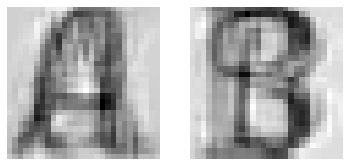

100


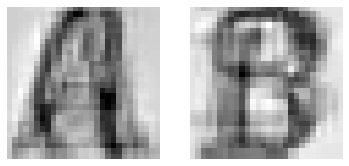

In [40]:
expected_dim = 0 
# copy the first 20 singular values
def generate_projection(expected_dim) :
  S0_20 = S0.copy()
  S0_20[expected_dim:] = 0

  S1_20 = S1.copy()
  S1_20[expected_dim:] = 0


  # here we multiply S0_20 with a random vector 
  # with each component between 0 and 1
  # which is same for both S and D

  random_vec = np.random.rand(len(S0_20))
  plt.imshow(random_vec.reshape(1, -1), cmap='gray')
  plt.axis('off')
  plt.show()

  S0_20 = S0_20 * random_vec
  S1_20 = S1_20 * random_vec



  projected_d = U0.dot(np.diag(S0_20)).dot(V0)
  projected_s = U1.dot(np.diag(S1_20)).dot(V1)

  plt.subplot(1, 2, 1)
  plt.imshow(projected_d[0].reshape(28, 28) + mean_d, cmap='gray')
  plt.axis('off')
  plt.subplot(1, 2, 2)
  plt.imshow(projected_s[0].reshape(28, 28) + mean_s, cmap='gray')
  plt.axis('off')
  plt.show()

for i in range(0, 101, 10) :
  print(i)
  generate_projection(i)

(26, 784)


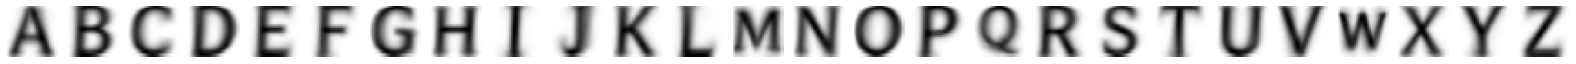

In [41]:
# working with all characters 
alphabet = 26

char_array = images.reshape(count_fonts, alphabet, 28*28)

char_mean = char_array.mean(axis=0)
print(char_mean.shape)


plt.subplots(figsize=(28, 28))
for i in range(alphabet) :
  plt.subplot(1, alphabet, i+1)
  plt.imshow(char_mean[i].reshape(28, 28), cmap='gray')
  plt.axis('off')
plt.show()
# Average characters look readable

(747, 26, 784)


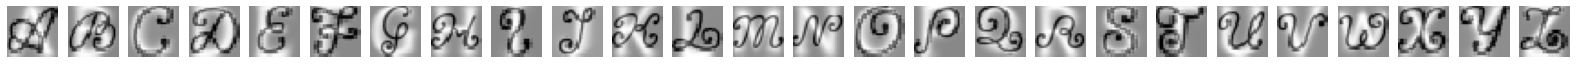

In [46]:
char_array_0 = char_array - char_mean
print(char_array_0.shape)

plt.subplots(figsize=(28, 28))

index = np.random.choice(count_fonts)

for i in range(26) :
  plt.subplot(1, 26, i+1)
  plt.imshow(char_array_0[index, i].reshape(28, 28), cmap='gray')
  plt.axis('off')
plt.show()
# however, there is also a pattern in the deviation from the mean